# BertTopic

In this tutorial we will be using a package called BERTopic. Which utilize BERT for topic modelling. Those of you who are interested to know how it works are encouraged to read the following [link](https://maartengr.github.io/BERTopic/tutorial/algorithm/algorithm.html) 




# Installing BERTopic

We start by installing BERTopic from PyPi:

In [ ]:
%%capture
!pip install -q bertopic

## Restart the Notebook
After installing BERTopic, some packages that were already loaded were updated and in order to correctly use them, we should now restart the notebook.

From the Menu:

Runtime → Restart Runtime

# **Data**
For this tutorial, we will be needing to extract all Trump's Tweet from his @realDonalTrump account. We will be removing all retweet and focus on his original tweets. 


In [ ]:
import re
import pandas as pd
from datetime import datetime

# Load data
trump = pd.read_csv('https://drive.google.com/uc?export=download&id=1xRKHaP-QwACMydlDnyFPEaFdtskJuBa6')

# Filter
trump.text = trump.apply(lambda row: re.sub(r"http\S+", "", row.text).lower(), 1)
trump.text = trump.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.text.split())), 1)
trump.text = trump.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.text).split()), 1)
trump = trump.loc[(trump.isRetweet == "f") & (trump.text != ""), :]
timestamps = trump.date.to_list()
tweets = trump.text.to_list()

In [ ]:
tweets[0]

## Basic Topic Model


In [ ]:
from bertopic import BERTopic
topic_model = BERTopic(nr_topics=100 ,verbose=True)
topics, _ = topic_model.fit_transform(tweets)

The topics variable  is the assignment of the tweets to the corresponding 100 clusters please note that tweets with a value of -1 are unassigned to any cluster.

In [ ]:
print(topics)
print(len(tweets))
print(len(topics))

We can then extract most frequent topics:

In [ ]:
freq = topic_model.get_topic_info(); freq.head(10)

-1 refers to all outliers and should typically be ignored. Next, let's take a look at a frequent topic that were generated:

In [ ]:
topic_nr = freq.iloc[3]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

We can visualize the basic topics that were created with the Intertopic Distance Map. 

In [ ]:
fig = topic_model.visualize_topics(); fig



# Silhouette Score

We will now move to your part, in which you will need to implement Silhouette score. A way to evaluate the quality of the clusters.

(source: wikipedia) The Silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters. 

The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance. 

The score can be calculated using the following:





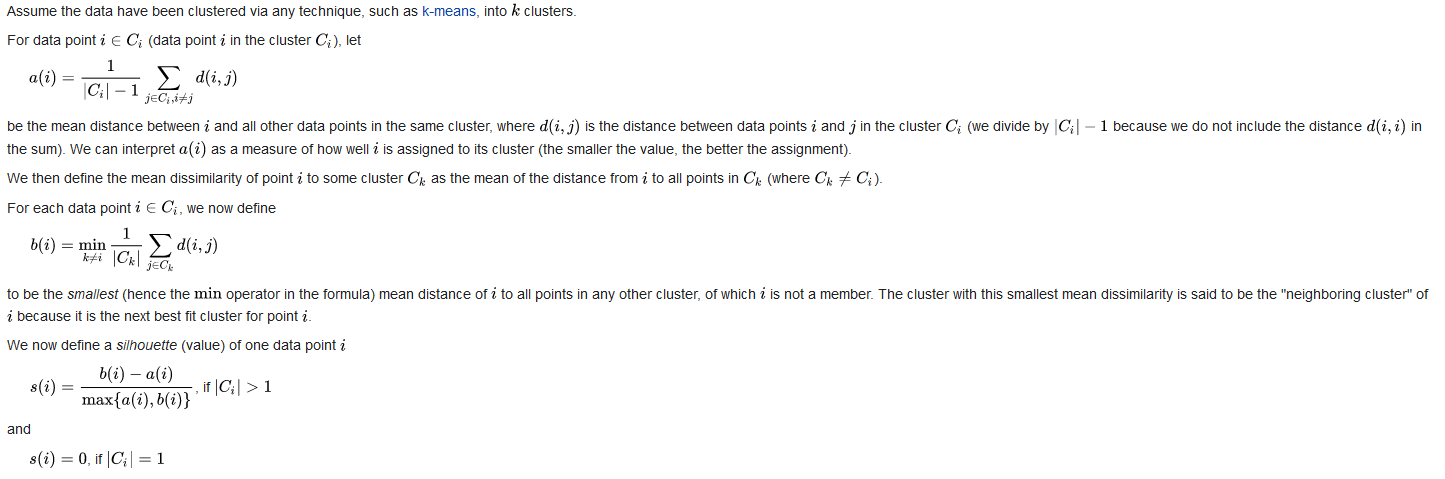

After calculating the score for each data point we can derive the score for the entire dataset by simply taking the mean.

# EX 1

Implement the score (for the entire dataset). Then claculate the score  coresponding to 5 instances of the topic modelling, each time calculated with a different number of topics  (nr_topics parameter in fit_transform) from the following values (50,100,150,250,500)


**Note thay you need to decide a few things on your own, e.g. which distance to use?**

## Good Luck